# Chapter 12 回帰分析

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

%precision 3
%matplotlib inline

In [2]:
df = pd.read_csv('../data/ch12_scores_reg.csv')
n = len(df)
print(n)
df.head()

20


,小テスト,期末テスト,睡眠時間,通学方法
0,4.2,67,7.2,バス
1,7.2,71,7.9,自転車
2,0.0,19,5.3,バス
3,3.0,35,6.8,徒歩
4,1.5,35,7.5,徒歩


## 12.1 | 単回帰モデル

In [3]:
x = np.array(df['小テスト'])
y = np.array(df['期末テスト'])
p = 1

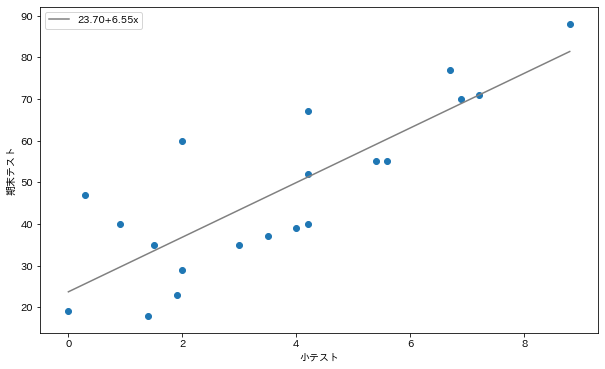

In [4]:
poly_fit = np.polyfit(x, y, 1)
poly_ld = np.poly1d(poly_fit)
xs = np.linspace(x.min(), x.max())
ys = poly_ld(xs)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('小テスト')
ax.set_ylabel('期末テスト')
ax.plot(xs, ys, color='gray',
label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x, y)
ax.legend()
plt.show()

### 12.1.1　回帰分析における仮説

回帰分析では次の 2 つを仮定する.
- 説明変数は確率変数ではない
- $誤差項 \epsilon_i は互いに独立に N (0, \sigma^2) に従う$

### 12.1.2　statsmodels による回帰分析

In [5]:
formula = '期末テスト ~ 小テスト'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  期末テスト   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Sun, 10 May 2020   Prob (F-statistic):           8.59e-06
Time:                        16:58:24   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
小テスト           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 12.1.3　回帰係数

In [6]:
X = np.array([np.ones_like(x), x]).T
X

array([[1. , 4.2],
       [1. , 7.2],
       [1. , 0. ],
       [1. , 3. ],
       [1. , 1.5],
       [1. , 0.9],
       [1. , 1.9],
       [1. , 3.5],
       [1. , 4. ],
       [1. , 5.4],
       [1. , 4.2],
       [1. , 6.9],
       [1. , 2. ],
       [1. , 8.8],
       [1. , 0.3],
       [1. , 6.7],
       [1. , 4.2],
       [1. , 5.6],
       [1. , 1.4],
       [1. , 2. ]])

In [7]:
beta0_hat, beta1_hat = np.linalg.lstsq(X, y)[0]
beta0_hat, beta1_hat

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(23.69949534673122, 6.553732606043082)

In [8]:
y_hat = beta0_hat + beta1_hat * x
eps_hat = y - y_hat

In [9]:
s_var = np.var(eps_hat, ddof=p+1)
s_var

134.29043473495898

In [10]:
C0, C1 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

In [11]:
np.sqrt(s_var * C0), np.sqrt(s_var * C1)

(4.713837012645705, 1.0685841387335373)

In [12]:
rv = stats.t(n-2)

lcl = beta0_hat - rv.isf(0.025) * np.sqrt(s_var * C0)
hcl = beta0_hat - rv.isf(0.975) * np.sqrt(s_var * C0)

lcl, hcl

(13.796091272760252, 33.60289942070219)

In [13]:
rv = stats.t(n-2)

lcl = beta1_hat - rv.isf(0.025) * np.sqrt(s_var * C1)
hcl = beta1_hat - rv.isf(0.975) * np.sqrt(s_var * C1)

lcl, hcl

(4.308720637125889, 8.798744574960274)

In [14]:
t = beta1_hat / np.sqrt(s_var * C1)
t

6.133099274532021

In [15]:
(1 - rv.cdf(t)) * 2

8.590875866687497e-06

In [16]:
t = beta0_hat / np.sqrt(s_var * C0)
t

5.0276442064401285

In [17]:
(1 - rv.cdf(t)) * 2

8.745298393209033e-05

## 12.2 | 重回帰モデル

In [18]:
formula = '期末テスト ~ 小テスト + 睡眠時間'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  期末テスト   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Sun, 10 May 2020   Prob (F-statistic):           6.19e-06
Time:                        16:58:24   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.874     -26.420      22.678
小テスト           6.4289      0.956      6.725      0.000       4.412       8.446
睡眠時間           4.1917      1.778      2.357      0.031       0.440       7.943
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.716
Skew:                           0.660   Prob(JB):                        0.424
Kurtosis:                       2.437   Cond. No.                         38.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 12.2.1　回帰係数

In [19]:
x1 = df['小テスト']
x2 = df['睡眠時間']
y = df['期末テスト']
p = 2

In [20]:
# 最小二乗法

X = np.array([np.ones_like(x1), x1, x2]).T
beta0_hat, beta1_hat, beta2_hat = np.linalg.lstsq(X, y)[0]

beta0_hat, beta1_hat, beta2_hat

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


(-1.8709143470995908, 6.42887834300237, 4.191706546398685)

In [21]:
y_hat = beta0_hat + beta1_hat*x1 + beta2_hat*x2
eps_hat = y - y_hat

In [22]:
s_var = np.sum(eps_hat**2) / (n - p - 1)
C0, C1, C2 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

In [23]:
rv = stats.t(n-p-1)

lcl = beta2_hat - rv.isf(0.025) * np.sqrt(s_var * C2)
hcl = beta2_hat - rv.isf(0.975) * np.sqrt(s_var * C2)

lcl, hcl

(0.440253332543481, 7.943159760253889)

### 12.2.2　ダミー変数

In [24]:
formula = '期末テスト ~ 小テスト + 睡眠時間 + 通学方法'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  期末テスト   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     13.46
Date:                Sun, 10 May 2020   Prob (F-statistic):           7.47e-05
Time:                        16:58:24   Log-Likelihood:                -72.368
No. Observations:                  20   AIC:                             154.7
Df Residuals:                      15   BIC:                             159.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.4788     12.068     -0.040      0.969     -26.202      25.244
通学方法[T.徒歩]     -5.8437      5.447     -1.073      0.300     -17.453       5.766
通学方法[T.自転車]     1.8118      6.324      0.286      0.778     -11.668      15.292
小テスト            6.0029      1.033      5.809      0.000       3.800       8.206
睡眠時間            4.5238      1.809      2.501      0.024       0.668       8.380
==============================================================================
Omnibus:                        1.764   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                0.989
Skew:                           0.545   Prob(JB):                        0.610
Kurtosis:                       2.985   Cond. No.                         39.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
x = np.array(df['小テスト'])
y = np.array(df['期末テスト'])
p = 1

result = smf.ols('期末テスト ~ 小テスト', df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  期末テスト   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Sun, 10 May 2020   Prob (F-statistic):           8.59e-06
Time:                        16:58:25   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
小テスト           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
y_hat = np.array(result.fittedvalues)
y_hat

array([51.225, 70.886, 23.699, 43.361, 33.53 , 29.598, 36.152, 46.638,
       49.914, 59.09 , 51.225, 68.92 , 36.807, 81.372, 25.666, 67.61 ,
       51.225, 60.4  , 32.875, 36.807])

In [27]:
eps_hat = np.array(result.resid)
eps_hat

array([ 15.775,   0.114,  -4.699,  -8.361,   1.47 ,  10.402, -13.152,
        -9.638, -10.914,  -4.09 , -11.225,   1.08 ,  -7.807,   6.628,
        21.334,   9.39 ,   0.775,  -5.4  , -14.875,  23.193])

In [28]:
# 残差二乗和を計算する

np.sum(eps_hat**2)

2417.227825229262

### 12.3.1　決定係数

In [29]:
total_var = np.sum((y - np.mean(y))**2)
exp_var = np.sum((y_hat - np.mean(y))**2)
unexp_var = np.sum(eps_hat**2)

In [30]:
total_var, exp_var + unexp_var

(7468.55, 7468.549999999996)

In [31]:
exp_var / total_var

0.6763457665504996

In [32]:
np.corrcoef(x, y)[0, 1]**2

0.6763457665504998

### 12.3.2　自由度調整済み決定係数

In [33]:
1 - (unexp_var / (n - p - 1)) / ((total_var / (n - 1)))

0.6583649758033057

### 12.3.3 F 検定

In [34]:
f = (exp_var / p) / (unexp_var / (n - p - 1))
f

37.61490671126522

In [35]:
rv = stats.f(p, n-p-1)
1 - rv.cdf(f)

8.590875866687497e-06

### 12.3.4　最大対数尤度と AIC

In [37]:
prob = 0.3
coin_result = [0, 1, 0, 0, 1]

rv = stats.bernoulli(prob)
L = np.prod(rv.pmf(coin_result))
L

0.030870000000000005

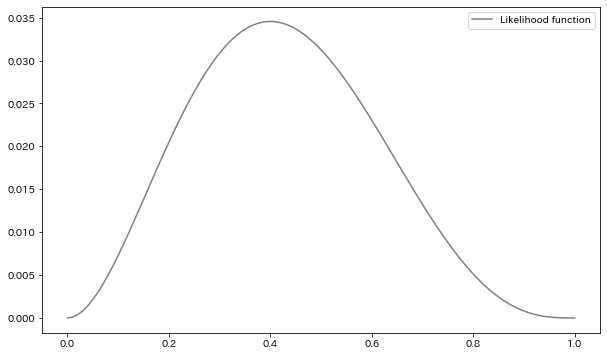

In [40]:
ps = np.linspace(0, 1, 100)
Ls = [np.prod(stats.bernoulli(prob).pmf(coin_result)) for prob in ps]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(ps, Ls, label='Likelihood function', color='gray')
ax.legend()

In [41]:
prob = 0.4
rv = stats.bernoulli(prob)
mll = np.sum(np.log(rv.pmf([0, 1, 0, 0, 1])))
mll

-3.365058335046282

In [42]:
rv = stats.norm(y_hat, np.sqrt(unexp_var / n))
mll = np.sum(np.log(rv.pdf(y)))
mll

-76.32521428624038

In [43]:
aic = -2 * mll + 2 * (p+1)
aic

156.65042857248076

In [44]:
bic = -2 * mll + np.log(n) * (p+1)
bic

158.64189311958876